In [47]:
!pip3 install -U ucimlrepo 
!pip install scikit-learn


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
from ucimlrepo import fetch_ucirepo

# Load the Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

# Access data
X = heart_disease.data.features
y = heart_disease.data.targets

# Create the DataFrame for the dataset
variables_df = pd.DataFrame(heart_disease.variables)

# Extract the names of the feature columns
feature_columns = variables_df[variables_df['role'] == 'Feature']['name'].tolist()

# Create a DataFrame with the features
df = pd.DataFrame(X, columns=feature_columns)

# Add the target variable to the DataFrame
df['target'] = y

# Display the first few rows of the DataFrame
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [50]:
#Data Preprocessing 

# Handle missing values if any
df = df.dropna()

# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
#Model Training and Evaluation
# Train an SVM model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM model
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')  # or 'micro', 'macro', etc.
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM F1 Score: {svm_f1}")



SVM Accuracy: 0.6333333333333333
SVM Precision: 0.5173550724637681
SVM Recall: 0.6333333333333333
SVM F1 Score: 0.5669336840427228


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
#Baseline Models:Neural Network
from sklearn.neural_network import MLPClassifier

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Neural Network model
nn = MLPClassifier(random_state=42)
nn.fit(X_train, y_train)

# Predict on the test set
y_pred_nn = nn.predict(X_test)

# Evaluate the Neural Network model
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn, average='weighted')  # or 'micro', 'macro', etc.
nn_recall = recall_score(y_test, y_pred_nn, average='weighted')
nn_f1 = f1_score(y_test, y_pred_nn, average='weighted')

print(f"Neural Network Accuracy: {nn_accuracy}")
print(f"Neural Network Precision: {nn_precision}")
print(f"Neural Network Recall: {nn_recall}")
print(f"Neural Network F1 Score: {nn_f1}")


Neural Network Accuracy: 0.6166666666666667
Neural Network Precision: 0.576025641025641
Neural Network Recall: 0.6166666666666667
Neural Network F1 Score: 0.594812865497076


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
#Baseline Models: Random Forest

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Random Forest F1 Score: {rf_f1}")



Random Forest Accuracy: 0.6
Random Forest Precision: 0.4595744680851064
Random Forest Recall: 0.6
Random Forest F1 Score: 0.5204819277108433


In [54]:
#Baseline Models: KNN

from sklearn.neighbors import KNeighborsClassifier

# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the K-Nearest Neighbors model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

print(f"K-Nearest Neighbors Accuracy: {knn_accuracy}")
print(f"K-Nearest Neighbors Precision: {knn_precision}")
print(f"K-Nearest Neighbors Recall: {knn_recall}")
print(f"K-Nearest Neighbors F1 Score: {knn_f1}")



K-Nearest Neighbors Accuracy: 0.65
K-Nearest Neighbors Precision: 0.5694444444444444
K-Nearest Neighbors Recall: 0.65
K-Nearest Neighbors F1 Score: 0.597003367003367


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 Model  Accuracy  Precision    Recall  F1 Score
0                  SVM  0.633333   0.517355  0.633333  0.566934
1       Neural Network  0.616667   0.576026  0.616667  0.594813
2        Random Forest  0.600000   0.459574  0.600000  0.520482
3  K-Nearest Neighbors  0.650000   0.569444  0.650000  0.597003


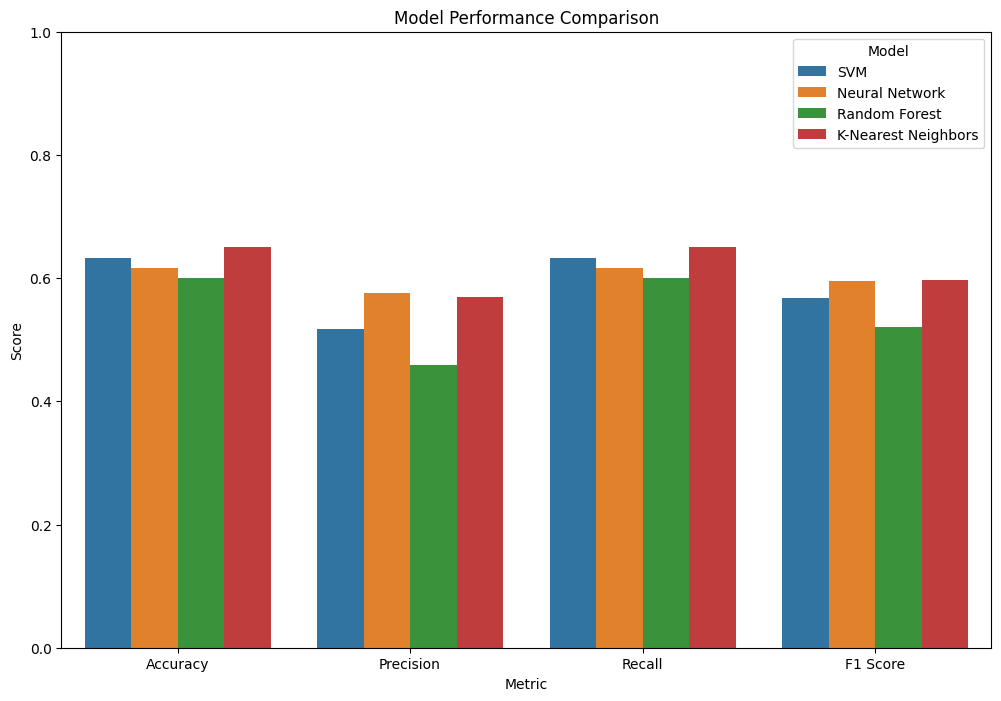

In [55]:
# Summarize the performance of all models
performance = pd.DataFrame({
    'Model': ['SVM', 'Neural Network', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy': [svm_accuracy, nn_accuracy, rf_accuracy, knn_accuracy],
    'Precision': [svm_precision, nn_precision, rf_precision, knn_precision],
    'Recall': [svm_recall, nn_recall, rf_recall, knn_recall],
    'F1 Score': [svm_f1, nn_f1, rf_f1, knn_f1]
})

# Print the performance DataFrame
print(performance)

# Pivot the DataFrame to have metrics as rows and models as columns
performance_pivot = performance.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot the performance metrics for comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=performance_pivot)
plt.ylim(0, 1)  # Adjust the y-axis limits to reduce vertical space
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()
